# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv("Udacity_AZDIAS_Subset.csv",sep=";")

# Load in the feature summary file.
feat_info = pd.read_csv("AZDIAS_Feature_Summary.csv", sep=";")

In [3]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
print("General demographic table has {} samples and {} features.".format(azdias.shape[0], azdias.shape[1]))
null_stats = azdias.isnull().sum()
print("{} cells are empty".format(sum(null_stats)))

General demographic table has 891221 samples and 85 features.
4896838 cells are empty


In [4]:
print("None value statistics for features:")
for idx, (col, nan_counts) in enumerate(zip(azdias.columns, null_stats)):
    print("{}: {}".format(col, nan_counts), end="\n")

None value statistics for features:
AGER_TYP: 0
ALTERSKATEGORIE_GROB: 0
ANREDE_KZ: 0
CJT_GESAMTTYP: 4854
FINANZ_MINIMALIST: 0
FINANZ_SPARER: 0
FINANZ_VORSORGER: 0
FINANZ_ANLEGER: 0
FINANZ_UNAUFFAELLIGER: 0
FINANZ_HAUSBAUER: 0
FINANZTYP: 0
GEBURTSJAHR: 0
GFK_URLAUBERTYP: 4854
GREEN_AVANTGARDE: 0
HEALTH_TYP: 0
LP_LEBENSPHASE_FEIN: 4854
LP_LEBENSPHASE_GROB: 4854
LP_FAMILIE_FEIN: 4854
LP_FAMILIE_GROB: 4854
LP_STATUS_FEIN: 4854
LP_STATUS_GROB: 4854
NATIONALITAET_KZ: 0
PRAEGENDE_JUGENDJAHRE: 0
RETOURTYP_BK_S: 4854
SEMIO_SOZ: 0
SEMIO_FAM: 0
SEMIO_REL: 0
SEMIO_MAT: 0
SEMIO_VERT: 0
SEMIO_LUST: 0
SEMIO_ERL: 0
SEMIO_KULT: 0
SEMIO_RAT: 0
SEMIO_KRIT: 0
SEMIO_DOM: 0
SEMIO_KAEM: 0
SEMIO_PFLICHT: 0
SEMIO_TRADV: 0
SHOPPER_TYP: 0
SOHO_KZ: 73499
TITEL_KZ: 73499
VERS_TYP: 0
ZABEOTYP: 0
ALTER_HH: 73499
ANZ_PERSONEN: 73499
ANZ_TITEL: 73499
HH_EINKOMMEN_SCORE: 18348
KK_KUNDENTYP: 584612
W_KEIT_KIND_HH: 107602
WOHNDAUER_2008: 73499
ANZ_HAUSHALTE_AKTIV: 93148
ANZ_HH_TITEL: 97008
GEBAEUDETYP: 93148
KONSUMNAEHE:

In [5]:
azdias.head(5)

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [6]:
# all types of missing or unknown codes
set(feat_info['missing_or_unknown'])

{'[-1,0,9]',
 '[-1,0]',
 '[-1,9]',
 '[-1,XX]',
 '[-1,X]',
 '[-1]',
 '[0]',
 '[XX]',
 '[]'}

> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [7]:
# Extract code from strings, generate list of codes in number or "XX"
def extract_codes(string):
    content = string[1:-1]
    special_maker = "X"
    if not content:
        return []
    codes = content.split(',')
    return [int(code) if "X" not in code else code for code in codes]    
        
feat_info["converted_null_code"] = feat_info['missing_or_unknown'].apply(extract_codes)


In [8]:
# Identify missing or unknown data values and convert them to NaNs.
def convert2nan(feat, val, feat_info):
    if val in feat_info.loc[feat,'converted_null_code']:
        return np.NaN
    return val

raw_index = feat_info.index
feat_info.index = feat_info['attribute']
for col in azdias.columns:
    azdias[col] = azdias[col].apply(lambda val: convert2nan(col, val, feat_info))
feat_info.index = raw_index

In [9]:
ap_null_stats = azdias.isnull().sum()
print("After parsing, there are {} cells with missing values".format(sum(null_stats)))

After parsing, there are 4896838 cells with missing values


In [10]:
for idx, (col, nan_counts, ap_nan_counts) in enumerate(zip(azdias.columns, null_stats, ap_null_stats)):
    print("{}:\nNatural: {} \nManual: {} \ntotal: {}\n".format(col, nan_counts, ap_nan_counts - nan_counts, ap_nan_counts), end="\n")

AGER_TYP:
Natural: 0 
Manual: 685843 
total: 685843

ALTERSKATEGORIE_GROB:
Natural: 0 
Manual: 2881 
total: 2881

ANREDE_KZ:
Natural: 0 
Manual: 0 
total: 0

CJT_GESAMTTYP:
Natural: 4854 
Manual: 0 
total: 4854

FINANZ_MINIMALIST:
Natural: 0 
Manual: 0 
total: 0

FINANZ_SPARER:
Natural: 0 
Manual: 0 
total: 0

FINANZ_VORSORGER:
Natural: 0 
Manual: 0 
total: 0

FINANZ_ANLEGER:
Natural: 0 
Manual: 0 
total: 0

FINANZ_UNAUFFAELLIGER:
Natural: 0 
Manual: 0 
total: 0

FINANZ_HAUSBAUER:
Natural: 0 
Manual: 0 
total: 0

FINANZTYP:
Natural: 0 
Manual: 0 
total: 0

GEBURTSJAHR:
Natural: 0 
Manual: 392318 
total: 392318

GFK_URLAUBERTYP:
Natural: 4854 
Manual: 0 
total: 4854

GREEN_AVANTGARDE:
Natural: 0 
Manual: 0 
total: 0

HEALTH_TYP:
Natural: 0 
Manual: 111196 
total: 111196

LP_LEBENSPHASE_FEIN:
Natural: 4854 
Manual: 92778 
total: 97632

LP_LEBENSPHASE_GROB:
Natural: 4854 
Manual: 89718 
total: 94572

LP_FAMILIE_FEIN:
Natural: 4854 
Manual: 72938 
total: 77792

LP_FAMILIE_GROB:
Natural: 48

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [11]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.
for feat, an_nan_counts in zip(ap_null_stats.index, ap_null_stats):
    print("{}: {}".format(feat, an_nan_counts))

AGER_TYP: 685843
ALTERSKATEGORIE_GROB: 2881
ANREDE_KZ: 0
CJT_GESAMTTYP: 4854
FINANZ_MINIMALIST: 0
FINANZ_SPARER: 0
FINANZ_VORSORGER: 0
FINANZ_ANLEGER: 0
FINANZ_UNAUFFAELLIGER: 0
FINANZ_HAUSBAUER: 0
FINANZTYP: 0
GEBURTSJAHR: 392318
GFK_URLAUBERTYP: 4854
GREEN_AVANTGARDE: 0
HEALTH_TYP: 111196
LP_LEBENSPHASE_FEIN: 97632
LP_LEBENSPHASE_GROB: 94572
LP_FAMILIE_FEIN: 77792
LP_FAMILIE_GROB: 77792
LP_STATUS_FEIN: 4854
LP_STATUS_GROB: 4854
NATIONALITAET_KZ: 108315
PRAEGENDE_JUGENDJAHRE: 108164
RETOURTYP_BK_S: 4854
SEMIO_SOZ: 0
SEMIO_FAM: 0
SEMIO_REL: 0
SEMIO_MAT: 0
SEMIO_VERT: 0
SEMIO_LUST: 0
SEMIO_ERL: 0
SEMIO_KULT: 0
SEMIO_RAT: 0
SEMIO_KRIT: 0
SEMIO_DOM: 0
SEMIO_KAEM: 0
SEMIO_PFLICHT: 0
SEMIO_TRADV: 0
SHOPPER_TYP: 111196
SOHO_KZ: 73499
TITEL_KZ: 889061
VERS_TYP: 111196
ZABEOTYP: 0
ALTER_HH: 310267
ANZ_PERSONEN: 73499
ANZ_TITEL: 73499
HH_EINKOMMEN_SCORE: 18348
KK_KUNDENTYP: 584612
W_KEIT_KIND_HH: 147988
WOHNDAUER_2008: 73499
ANZ_HAUSHALTE_AKTIV: 99611
ANZ_HH_TITEL: 97008
GEBAEUDETYP: 93148
KONS

In [12]:
zero_nan = []
bt_1_1e4 = []
bt_1e4_1e5 = []
bt_1e5_17e4 = []
above_17e4 = []
for feat, ap_nan_counts in zip(ap_null_stats.index, ap_null_stats):
    if  ap_nan_counts == 0:
        zero_nan.append(feat)
    elif 1e4 >= ap_nan_counts:
        bt_1_1e4.append(feat)
    elif 1e5 >= ap_nan_counts:
        bt_1e4_1e5.append(feat)
    elif 17e4 >= ap_nan_counts:
        bt_1e5_17e4.append(feat)
    else:
        above_17e4.append(feat)
print("zero({}):\n{}".format(len(zero_nan), zero_nan))
print("1~1e4({}):\n{}".format(len(bt_1_1e4), bt_1_1e4))
print("1e4~1e5({}):\n{}".format(len(bt_1e4_1e5),bt_1e4_1e5))
print("1e5~1.7e5({}):\n{}".format(len(bt_1e5_17e4),bt_1e5_17e4))
print("above 1.7e5({}):\n{}".format(len(above_17e4),above_17e4))

zero(24):
['ANREDE_KZ', 'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'FINANZTYP', 'GREEN_AVANTGARDE', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV', 'ZABEOTYP']
1~1e4(7):
['ALTERSKATEGORIE_GROB', 'CJT_GESAMTTYP', 'GFK_URLAUBERTYP', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'RETOURTYP_BK_S', 'ONLINE_AFFINITAET']
1e4~1e5(26):
['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'SOHO_KZ', 'ANZ_PERSONEN', 'ANZ_TITEL', 'HH_EINKOMMEN_SCORE', 'WOHNDAUER_2008', 'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'GEBAEUDETYP', 'KONSUMNAEHE', 'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ', 'WOHNLAGE', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015', 'CAMEO_INTL_2015', 'BALLRAUM', 'EWDICHTE', 'INNENSTADT', 'GEBAEUDETYP_RASTER', 'ARBEIT', 'ORTSGR_KLS9', 'RELAT_AB']
1e5~1.7e5(22):
['HEALTH_

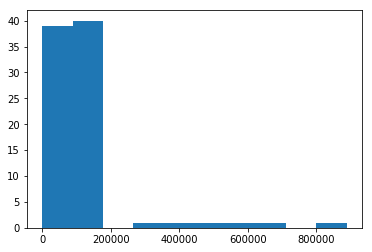

In [13]:
# Investigate patterns in the amount of missing data in each column.
_ = plt.hist(ap_null_stats.values)

In [14]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
features_to_drop = [feat for feat, an_nan_counts in zip(ap_null_stats.index, ap_null_stats) if an_nan_counts > 3e5]
filtered_azdias = azdias.drop(labels=features_to_drop, axis=1)
print("{} features left after filtering outliers".format(filtered_azdias.shape[1]))

79 features left after filtering outliers


#### Discussion 1.1.2: Assess Missing Data in Each Column

- From the histogram, we can find that the majority (79) of the features have missing values fewer than 170000.
- There are 24 columns contain no missing data.
- There are 7 columns contain missing data ranging in the (1, 1000] interval.
- There are 26 columns contain missing data ranging in the (1000, 10000] interval
- There are 22 columns contain missing data ranging in the (100000, 170000] interval.
- The left 6 columns each has over 300,000 missing values, which is almost 1/3 of the datapoints.

There are interesting patterns, some missing values are associated across columns, meaning that if one datapoint has missing value in one column, it will contain missing values in all the assossiated columns. Here are the group of associated columns:

- LP_FAMILIE_FEIN, LP_FAMILIE_GROB
- LP_STATUS_FEIN, LP_STATUS_GROB, CJT_GESAMTTYP, GFK_URLAUBERTYP, RETOURTYP_BK_S, ONLINE_AFFINITAET
- MIN_GEBAEUDEJAHR, OST_WEST_KZ, WOHNLAGE, GEBAEUDETYP
- KBA05_ANTG1, KBA05_ANTG2, KBA05_ANTG3, KBA05_ANTG4, KBA05_GBZ
- BALLRAUM, EWDICHTE, INNENSTADT
- PLZ8_ANTG1, PLZ8_ANTG2, PLZ8_ANTG3, PLZ8_ANTG4, PLZ8_BAUMAX, PLZ8_HHZ, PLZ8_GBZ
- ARBEIT, ORTSGR_KLS9, RELAT_AB

Finally, the following 6 columns were removed as they contain too many missing values: 
- AGER_TYP
- GEBURTSJAHR
- TITEL_KZ
- ALTER_HH
- KK_KUNDENTYP
- KBA05_BAUMAX



#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

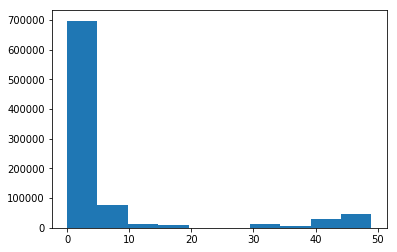

In [15]:
# How much data is missing in each row of the dataset?
row_nan_stats = filtered_azdias.isnull().sum(axis=1)
_ = plt.hist(row_nan_stats)

In [16]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
low_threshold = 20
high_threshold = 20
little_missing = filtered_azdias.iloc[row_nan_stats.index[row_nan_stats <= low_threshold],:].copy()
great_missing = filtered_azdias.iloc[row_nan_stats.index[row_nan_stats > high_threshold],:].copy()

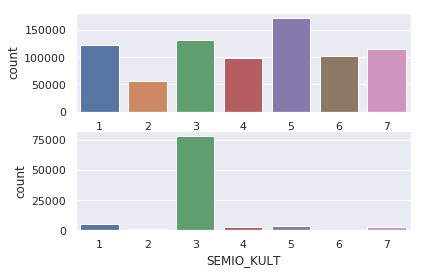

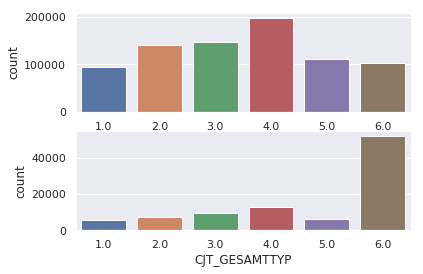

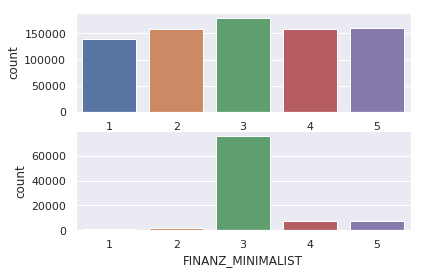

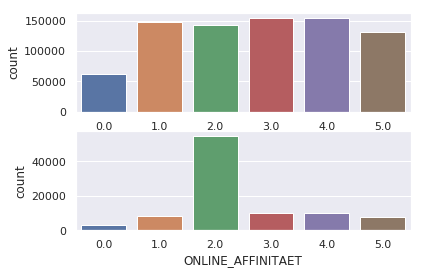

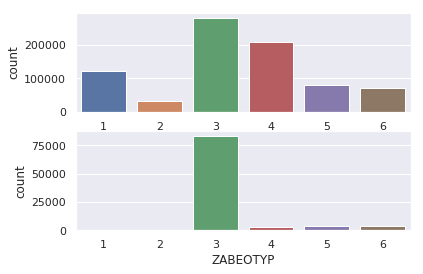

In [17]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.
import seaborn as sns
candidate_cols = ["SEMIO_KULT", "CJT_GESAMTTYP","FINANZ_MINIMALIST","ONLINE_AFFINITAET", "ZABEOTYP"]
def plot_value_distributions(col, little_missing, great_missing):
    sns.set(style="darkgrid")
    f, ax = plt.subplots(2, 1)
    a = sns.countplot(x=col, data=little_missing, ax=ax[0] )
    a = sns.countplot(x=col, data=great_missing, ax=ax[1])
    return a

for col in candidate_cols:
    plot_value_distributions(col, little_missing, great_missing)

#### Discussion 1.1.3: Assess Missing Data in Each Row

- The majority of the datapoints are free from (==0) or only have a few (<5) missing values.
- There are also a proportion of the datapoints with more than half (>= 40) of their feature values missing.
- After dividing the dataset into two subsets, one subset contains all the datapoints with fewer than 20 missing values, while the other contains those with more than 20 values. Plots of the distributions of the two subsets 
with respect to 5 features which contains no or only a few missing values showed that the two subsets look very different, implying that the two subsets may have distinct distributions. As a result, we should not drop them for they are special.


### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [18]:
# How many features are there of each data type?
print("Number of categorial features: {}.".format(np.sum(feat_info.iloc[:,2] == "categorical")))
print("Number of mixed features: {}.".format(np.sum(feat_info.iloc[:,2] == "mixed")))

Number of categorial features: 21.
Number of mixed features: 7.


#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [19]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?
binary_features = {}
multi_level_features = {}
for feat, feat_type in feat_info[['attribute','type']].values.tolist():
    if feat_type == "categorical" and feat not in features_to_drop:
        feat_vals = set(little_missing[feat].dropna())
        if len(feat_vals) == 2:
            binary_features[feat] = feat_vals
        else:
            multi_level_features[feat] = feat_vals
print("Binary features: ", binary_features)
print("Multi-level features: ",multi_level_features)

Binary features:  {'ANREDE_KZ': {1, 2}, 'GREEN_AVANTGARDE': {0, 1}, 'SOHO_KZ': {0.0, 1.0}, 'VERS_TYP': {1.0, 2.0}, 'OST_WEST_KZ': {'W', 'O'}}
Multi-level features:  {'CJT_GESAMTTYP': {1.0, 2.0, 3.0, 4.0, 5.0, 6.0}, 'FINANZTYP': {1, 2, 3, 4, 5, 6}, 'GFK_URLAUBERTYP': {1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0}, 'LP_FAMILIE_FEIN': {1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0}, 'LP_FAMILIE_GROB': {1.0, 2.0, 3.0, 4.0, 5.0}, 'LP_STATUS_FEIN': {1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0}, 'LP_STATUS_GROB': {1.0, 2.0, 3.0, 4.0, 5.0}, 'NATIONALITAET_KZ': {1.0, 2.0, 3.0}, 'SHOPPER_TYP': {0.0, 1.0, 2.0, 3.0}, 'ZABEOTYP': {1, 2, 3, 4, 5, 6}, 'GEBAEUDETYP': {1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0}, 'CAMEO_DEUG_2015': {'7', '9', '5', '1', '6', '4', '8', '3', '2'}, 'CAMEO_DEU_2015': {'2B', '6E', '5E', '9B', '3C', '7B', '1D', '1E', '7E', '8B', '8D', '4E', '4D', '6B', '9E', '5C', '5A', '4C', '2D', '6A', '5F', '8A', '2A', '5D', '6D', '7D', '9C', '6C', '1A', '9A', '9D',

In [20]:
# Re-encode categorical variable(s) to be kept in the analysis.
# I want to keep the np.NaN in the dataset for later permutation
little_missing['OST_WEST_KZ'] = little_missing['OST_WEST_KZ'].apply(lambda x: {"W":1,"O":0}.get(x,np.NaN))
ml_features_for_dropping = [feat for feat in multi_level_features.keys() if feat not in features_to_drop]
little_missing = little_missing.drop(ml_features_for_dropping, axis=1)

#### Discussion 1.2.1: Re-Encode Categorical Features

- There are 21 categorical features and 7 mixed features in the raw dataset.
- For Categorical features, 5 of them are binary features while 16 of them are multi-level features.
- I re-encoded the OST_WEST_KZ feature to 1 (W) and 0 (O) respectively, while keeping the missing value for later processing.
- I dropped all the multi-level categorical features considerring potential memory cost.

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [21]:
# Explore mixed features
mixed_feats = {}
for feat, feat_type in feat_info[['attribute','type']].values.tolist():
    if feat_type == "mixed" and feat not in features_to_drop:
        feat_vals = set(little_missing[feat].dropna())
        mixed_feats[feat] = feat_vals
print("Mixed features: ", mixed_feats)


Mixed features:  {'LP_LEBENSPHASE_FEIN': {1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0}, 'LP_LEBENSPHASE_GROB': {1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0}, 'PRAEGENDE_JUGENDJAHRE': {1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0}, 'WOHNLAGE': {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0}, 'CAMEO_INTL_2015': {'51', '44', '24', '31', '13', '15', '35', '14', '52', '34', '54', '22', '55', '43', '41', '12', '33', '32', '25', '23', '45'}, 'PLZ8_BAUMAX': {1.0, 2.0, 3.0, 4.0, 5.0}}


In [22]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
PRAEGENDE_JUGENDJAHRE = "PRAEGENDE_JUGENDJAHRE"
def re_encode_pj_decade(val):
    if np.isnan(val): return val
    if val > 1 and val % 2 == 0:
        return val//2
    return val
def re_encode_pj_movement(val):
    if np.isnan(val): return val
    if val in [1,3,5,8,10,12,14]:
        return 1
    return 0
    
little_missing[PRAEGENDE_JUGENDJAHRE + "_DECADE"] = little_missing[PRAEGENDE_JUGENDJAHRE].apply(lambda x: re_encode_pj_decade(x))
little_missing[PRAEGENDE_JUGENDJAHRE+"_MOVEMENT"] = little_missing[PRAEGENDE_JUGENDJAHRE].apply(lambda x: re_encode_pj_movement(x))


In [23]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
CAMEO_INTL_2015 = "CAMEO_INTL_2015"
def re_encode_ci2_wealth(val):
    if type(val) == type(""):
        val = int(val)
    if np.isnan(val): return val
    return val // 10
    
def re_encode_ci2_stage(val):
    if type(val) == type(""):
        val = int(val)
    if np.isnan(val): return val
    return val % 10

little_missing[CAMEO_INTL_2015+"_wealth"] = little_missing[CAMEO_INTL_2015].apply(lambda x: re_encode_ci2_wealth(x))
little_missing[CAMEO_INTL_2015+"_lifestatus"] = little_missing[CAMEO_INTL_2015].apply(lambda x: re_encode_ci2_stage(x))


In [24]:
little_missing = little_missing.drop([PRAEGENDE_JUGENDJAHRE, CAMEO_INTL_2015], axis=1)
mixed_feat_to_reencode= ["PLZ8_BAUMAX", "WOHNLAGE", "LP_LEBENSPHASE_FEIN","LP_LEBENSPHASE_GROB"]
little_missing = pd.get_dummies(data=little_missing, columns=mixed_feat_to_reencode)

#### Discussion 1.2.2: Engineer Mixed-Type Features

- There are 6 mixed features left after the former processing. Some of these features (PRAEGENDE_JUGENDJAHRE and CAMEO_INTL_2015) consist of two or more inter-wingled dimensions, while some have values indicating different aspects. For instance, WOHNLAGE has the following values:
    - -1: unknown
    - 0: no score calculated
    - 1: very good neighborhood
    - 2: good neighborhood
    - 3: average neighborhood
    - 4: poor neighborhood
    - 5: very poor neighborhood
    - 7: rural neighborhood
    - 8: new building in rural neighborhood
    
The status of neighborhood is mingled with locaion (rural) and income, but I can not tell if rural neighborhood is "poor neighborhood" or "very poor neighborhood". The other 3 Mixed variables, like WOHNLAGE are also hard to engineer.

- While features PRAEGENDE_JUGENDJAHRE and CAMEO_INTL_2015 were engineered to yield new seperate features, the rest 4 mixed features lack levels to be cleanly seperated into sub features, as a result, I created dummy variables for these 4 mixed features.


#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [25]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)



751879/102867954 total missing values


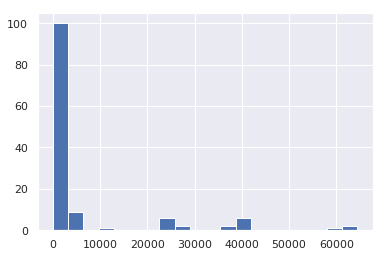

In [26]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.
lm_nan_stats = little_missing.isnull().sum(axis=0)
plt.hist(lm_nan_stats, bins=20)
print("{}/{} total missing values".format(lm_nan_stats.sum(), little_missing.shape[0]*little_missing.shape[1]))

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [27]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    # Identify missing or unknown data values and convert them to NaNs.
    raw_index = feat_info.index
    feat_info.index = feat_info['attribute']
    for col in df.columns:
        df[col] = df[col].apply(lambda val: convert2nan(col, val, feat_info))
    feat_info.index = raw_index
    
    # remove selected columns and rows, ...
    filtered_df = df.drop(labels=features_to_drop, axis=1)
    
    # select, re-encode, and engineer column values.
    nan_stats = filtered_df.isnull().sum(axis=1)
    df_few_missing = filtered_df.iloc[nan_stats.index[nan_stats <=20],:].copy()
    df_great_missing = filtered_df.iloc[nan_stats.index[nan_stats > 20],:].copy()
    df_few_missing['OST_WEST_KZ'] = df_few_missing['OST_WEST_KZ'].apply(lambda x: {"W":1,"O":0}.get(x,np.NaN))
    df_few_missing = df_few_missing.drop(ml_features_for_dropping, axis=1)
    df_few_missing[PRAEGENDE_JUGENDJAHRE + "_DECADE"] = df_few_missing[PRAEGENDE_JUGENDJAHRE].apply(lambda x: re_encode_pj_decade(x))
    df_few_missing[PRAEGENDE_JUGENDJAHRE+"_MOVEMENT"] = df_few_missing[PRAEGENDE_JUGENDJAHRE].apply(lambda x: re_encode_pj_movement(x))
    df_few_missing[CAMEO_INTL_2015+"_wealth"] = df_few_missing[CAMEO_INTL_2015].apply(lambda x: re_encode_ci2_wealth(x))
    df_few_missing[CAMEO_INTL_2015+"_lifestatus"] = df_few_missing[CAMEO_INTL_2015].apply(lambda x: re_encode_ci2_stage(x))
    df_few_missing = df_few_missing.drop([PRAEGENDE_JUGENDJAHRE, CAMEO_INTL_2015], axis=1)
    df_few_missing = pd.get_dummies(data=df_few_missing, columns=mixed_feat_to_reencode)
    # Return the cleaned dataframe.
    return df_few_missing, df_great_missing
    

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [28]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
print("After dropping df shape {}, before {}".format(little_missing.dropna().shape, little_missing.shape))
dropped_cols = {col:little_missing[col].dropna() for col in little_missing.columns}
non_nan_indices = {col:dropped.index for col, dropped in dropped_cols.items()}

After dropping df shape (623211, 129), before (797426, 129)


In [ ]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler
sdscalers = {}
for col in dropped_cols:
    sdscaler = StandardScaler()
    tmp_df = sdscaler.fit_transform(dropped_cols[col].values.reshape(-1,1))
    little_missing.loc[non_nan_indices[col],col] = tmp_df
    sdscalers[col] = sdscaler

In [30]:
from sklearn.preprocessing import Imputer
imputer = Imputer()
imputed_values = imputer.fit_transform(little_missing)


In [31]:
df_imputed = pd.DataFrame(imputed_values, columns=little_missing.columns)
df_imputed.head(5)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,LP_LEBENSPHASE_GROB_3.0,LP_LEBENSPHASE_GROB_4.0,LP_LEBENSPHASE_GROB_5.0,LP_LEBENSPHASE_GROB_6.0,LP_LEBENSPHASE_GROB_7.0,LP_LEBENSPHASE_GROB_8.0,LP_LEBENSPHASE_GROB_9.0,LP_LEBENSPHASE_GROB_10.0,LP_LEBENSPHASE_GROB_11.0,LP_LEBENSPHASE_GROB_12.0
0,-1.762670,0.958071,-1.494609,1.538200,-1.040726,1.466448,0.959677,1.338816,-0.530567,1.060487,...,-0.399226,-0.261901,-0.250729,5.298737,-0.165094,-0.19326,-0.247498,-0.223765,-0.201645,-0.308981
1,0.200955,0.958071,-1.494609,0.864824,-1.766955,-0.570799,0.244962,1.338816,1.884775,1.060487,...,-0.399226,-0.261901,-0.250729,-0.188724,-0.165094,-0.19326,-0.247498,-0.223765,-0.201645,-0.308981
2,1.182767,0.958071,0.683150,-0.481928,1.137960,-0.570799,-1.184467,-0.792034,-0.530567,-0.263765,...,-0.399226,-0.261901,-0.250729,-0.188724,-0.165094,-0.19326,-0.247498,-0.223765,-0.201645,-0.308981
3,0.200955,-1.043765,0.683150,0.191448,0.411731,-1.249881,0.244962,-0.792034,-0.530567,1.060487,...,-0.399226,-0.261901,-0.250729,-0.188724,-0.165094,-0.19326,-0.247498,4.468965,-0.201645,-0.308981
4,-1.762670,0.958071,-0.042770,-1.155304,1.137960,-0.570799,-0.469752,1.338816,-0.530567,1.060487,...,-0.399226,-0.261901,-0.250729,-0.188724,-0.165094,-0.19326,-0.247498,-0.223765,-0.201645,-0.308981


In [32]:
del azdias

### Discussion 2.1: Apply Feature Scaling

I temporarily removed missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation (average). The reasons are as follows:

- Why not simply dropping? Simply dropping nan datapoints results in us lossing over 170000 of the total instances. That is not a small number and those instances contianing only a few nan values might still be useful regarding their non-null dimensions.
- Why imputation after scaling? Because scaling requires computing mean and variance, if imputating before scaling, than the true means and variances of the features would be corrupted by the filled missing values, so I think scaling on the non-missing data and then do imputation for the missing values would be more reasonable.

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [33]:
# Apply PCA to the data.
from sklearn.decomposition import PCA
pca = PCA(n_components=80)
pca_res = pca.fit_transform(df_imputed)

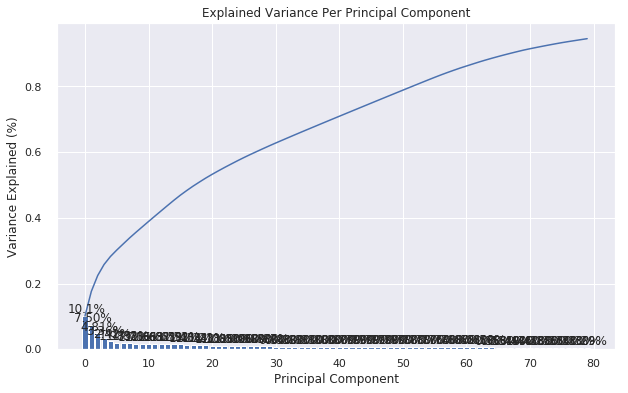

In [34]:
# Investigate the variance accounted for by each principal component.
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    

scree_plot(pca)

In [35]:
# Re-apply PCA to the data while selecting for number of components to retain.
n_components = 25
pca.set_params(n_components=n_components)
pca_res = pca.fit_transform(df_imputed)
print(sum(pca.explained_variance_ratio_))

0.5716026101572802


In [36]:
def transform_data(df):
    dropped_cols = {col:df[col].dropna() for col in df.columns}
    non_nan_indices = {col:dropped.index for col, dropped in dropped_cols.items()}
    for col in dropped_cols:
        sdscaler = sdscalers[col]
        tmp = sdscaler.transform(dropped_cols[col].values.reshape(-1,1))
        df.loc[non_nan_indices[col],col] = tmp
    imputed_values = imputer.transform(df)
    return pd.DataFrame(imputed_values, columns=df.columns)

### Discussion 2.2: Perform Dimensionality Reduction

- 25 Principal components/ transformed features are retained. These components explain 57% of the total variance, and greatly reduced the feature space.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [37]:
def get_weights(cmp_idx, pca, df):
    return sorted(zip(pca.components_[cmp_idx], df.columns), key=lambda x:x[0], reverse=True)

In [38]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.
for weight, feat in get_weights(0, pca, df_imputed):
    print(weight,"\t", feat)
    

0.2127613984537931 	 PLZ8_ANTG3
0.20575464261208382 	 PLZ8_ANTG4
0.19317086666229427 	 CAMEO_INTL_2015_wealth
0.19072485518976273 	 HH_EINKOMMEN_SCORE
0.18936950355238105 	 ORTSGR_KLS9
0.18718097244713391 	 EWDICHTE
0.1628166749103314 	 FINANZ_HAUSBAUER
0.1467219586583313 	 PLZ8_ANTG2
0.13847039286969498 	 KBA05_ANTG4
0.1361068918126769 	 ARBEIT
0.13256257300880334 	 PLZ8_BAUMAX_5.0
0.12832180758361403 	 RELAT_AB
0.1267307972085709 	 ANZ_HAUSHALTE_AKTIV
0.12382251343604873 	 KBA05_ANTG3
0.10321842187590724 	 LP_LEBENSPHASE_GROB_1.0
0.10139463400751467 	 FINANZ_SPARER
0.09616583504249658 	 PLZ8_BAUMAX_4.0
0.09552618850082824 	 PRAEGENDE_JUGENDJAHRE_MOVEMENT
0.08791280757003567 	 LP_LEBENSPHASE_FEIN_1.0
0.07877293446367296 	 WOHNLAGE_4.0
0.07334213230890542 	 SEMIO_PFLICHT
0.07325040942873372 	 PLZ8_BAUMAX_3.0
0.06971260622249566 	 LP_LEBENSPHASE_GROB_2.0
0.06939191788867746 	 SEMIO_REL
0.06863347275405295 	 LP_LEBENSPHASE_FEIN_2.0
0.06400568837685305 	 REGIOTYP
0.06284645339652078 	 LP_

In [39]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
for weight, feat in get_weights(1, pca, df_imputed):
    print(weight,"\t", feat)


0.26181954935326507 	 ALTERSKATEGORIE_GROB
0.24414317533051058 	 FINANZ_VORSORGER
0.2143423707630493 	 SEMIO_ERL
0.1805602494292123 	 SEMIO_LUST
0.16395449237965984 	 RETOURTYP_BK_S
0.15675742643991122 	 LP_LEBENSPHASE_GROB_2.0
0.11422582625160789 	 LP_LEBENSPHASE_FEIN_6.0
0.10851826993531319 	 W_KEIT_KIND_HH
0.10493996226173155 	 FINANZ_MINIMALIST
0.09299603871262137 	 SEMIO_KRIT
0.08122807869235105 	 FINANZ_HAUSBAUER
0.08004382028978528 	 LP_LEBENSPHASE_FEIN_8.0
0.07808814753589319 	 SEMIO_KAEM
0.06549789689402943 	 WOHNDAUER_2008
0.06107223086226691 	 ANREDE_KZ
0.05992574886607999 	 LP_LEBENSPHASE_FEIN_5.0
0.0577874447675938 	 LP_LEBENSPHASE_GROB_10.0
0.04977416084207501 	 EWDICHTE
0.048642360094686955 	 PLZ8_ANTG3
0.04838256451281872 	 ORTSGR_KLS9
0.04757357567492225 	 LP_LEBENSPHASE_FEIN_15.0
0.04651809948198382 	 LP_LEBENSPHASE_FEIN_31.0
0.045421593344649895 	 PLZ8_ANTG4
0.04530215546468703 	 SEMIO_DOM
0.045158663102622426 	 LP_LEBENSPHASE_FEIN_12.0
0.039302147962571914 	 CAMEO_I

In [40]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
for weight, feat in get_weights(2, pca, df_imputed):
    print(weight,"\t", feat)


0.3455025486522983 	 SEMIO_VERT
0.266338382125728 	 SEMIO_SOZ
0.26173460550242883 	 SEMIO_FAM
0.25101971254356015 	 SEMIO_KULT
0.1548761263967905 	 FINANZ_MINIMALIST
0.09484734112123372 	 RETOURTYP_BK_S
0.09079734074693117 	 SEMIO_REL
0.08061063126155181 	 W_KEIT_KIND_HH
0.07938703561283401 	 FINANZ_VORSORGER
0.06943489264350244 	 SEMIO_MAT
0.05490365851097336 	 ALTERSKATEGORIE_GROB
0.05264669876148843 	 GREEN_AVANTGARDE
0.04652269055834116 	 SEMIO_LUST
0.04287502999397761 	 LP_LEBENSPHASE_GROB_3.0
0.041311470980997245 	 ORTSGR_KLS9
0.04018723385788878 	 EWDICHTE
0.038086057729227143 	 PLZ8_ANTG4
0.03695090245888563 	 PLZ8_ANTG3
0.03287862449353717 	 PLZ8_BAUMAX_5.0
0.03172462630676966 	 LP_LEBENSPHASE_GROB_5.0
0.03096200996806864 	 LP_LEBENSPHASE_FEIN_9.0
0.029659995656149758 	 LP_LEBENSPHASE_FEIN_13.0
0.029522920461786683 	 ARBEIT
0.026697386160843512 	 RELAT_AB
0.026362444880220468 	 LP_LEBENSPHASE_FEIN_40.0
0.02614892977181969 	 WOHNDAUER_2008
0.025139727768072523 	 LP_LEBENSPHASE_

### Discussion 2.3: Interpret Principal Components

- The 1st Component,
   - top positively associated features:
       1. PLZ8_ANTG3 (Number of 6-10 family houses in the PLZ8 region)
       2. PLZ8_ANTG4 (Number of 10+ family houses in the PLZ8 region)
       3. CAMEO_INTL_2015_wealth (wealth sub feature of the CAMEO_INTL_2015 features)
   - top negatively associated features
       1. KBA05_ANTG1 (Number of 1-2 family houses in the microcell)
       2. PLZ8_ANTG1 (Number of 1-2 family houses in the PLZ8 region)
       3. MOBI_REGIO (Movement patterns)   
   - The 1st component is mostly assossiated with the wealth features.
   
   
- The 2nd Component,
   - top positively associated features
       1. ALTERSKATEGORIE_GROB (Estimated age based on given name analysis)
       2. FINANZ_VORSORGER (Financial typology, be prepared)
       3. SEMIO_ERL (Personality typology, event-oriented)
   - top negatively associated features
       1. FINANZ_UNAUFFAELLIGER (Financial typology - inconspicuous)
       2. SEMIO_REL (Personality typology, religious)
       3. FINANZ_SPARER (Financial typology, money-saver)
   - The 2nd component is most associated with personality and financial typology of individuals.
   
   
- The 3rd Component,
   - top positively associated features
       1. SEMIO_VERT (Personality typology, dreamful)
       2. SEMIO_SOZ (Personality typology, socailly-minded)
       3. SEMIO_FAM (Personality typology, family-minded)
   - top negatively associated features
       1. SEMIO_DOM (Personality typology, dominant-minded)
       2. SEMIO_KAEM (Personality typology, combative attitude)
       3. ANREDE_KZ (Gender)
   - The 3rd component is most associated with personality typology and gender, which also indicate personality and biological characteristics. 
    

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [41]:
# Over a number of different cluster counts...
from sklearn.cluster import KMeans
distances = []
ks = []
for k in range(5, 32, 1):
    # run k-means clustering on the data and...
    kms = KMeans(n_clusters=k, random_state=0).fit(pca_res)
    
    # compute the average within-cluster distances.
    avg_dist = -kms.score(pca_res)/pca_res.shape[0]
    distances.append(avg_dist)
    ks.append(k)
    print("k: {}, avg-distance: {}".format(k, avg_dist))
    

k: 5, avg-distance: 52.95788586910217
k: 6, avg-distance: 51.232860350015855
k: 7, avg-distance: 49.30719150965103
k: 8, avg-distance: 47.526098433857555
k: 9, avg-distance: 45.42046978800112
k: 10, avg-distance: 43.72068078784737
k: 11, avg-distance: 41.99741727636771
k: 12, avg-distance: 40.51028873250233
k: 13, avg-distance: 39.10992123451263
k: 14, avg-distance: 37.93768885779829
k: 15, avg-distance: 36.510126267250854
k: 16, avg-distance: 35.29848890744884
k: 17, avg-distance: 34.50601176719738
k: 18, avg-distance: 34.00348152580165
k: 19, avg-distance: 33.370435816093966
k: 20, avg-distance: 32.988042962272864
k: 21, avg-distance: 32.54650999787329
k: 22, avg-distance: 32.31085652511434
k: 23, avg-distance: 31.646442155762152
k: 24, avg-distance: 31.109274205682297
k: 25, avg-distance: 30.845208423463482
k: 26, avg-distance: 30.19988612821965
k: 27, avg-distance: 30.04687614103969
k: 28, avg-distance: 29.835175123995576
k: 29, avg-distance: 29.51089287592201
k: 30, avg-distance: 

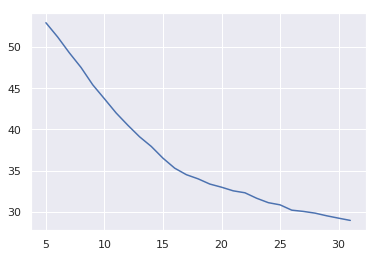

In [42]:
##### Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.
plt.plot(ks, distances)


In [43]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
n_clusters = 15
kms = KMeans(n_clusters=n_clusters, random_state=0).fit(pca_res)
clusters_general = kms.predict(pca_res)


### Discussion 3.1: Apply Clustering to General Population

When gradually increasing the number of clusters, the average distances decrease. At the beginning, the average distances decreased more quickly. From about 16 clusters, the decrease rate became rather small, the difference of average distances among the 24-30 clusters are minimal.

I finally decided to segment the population into 15 clusters.

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [44]:
# Load in the customer demographics data.
customers = pd.read_csv("Udacity_CUSTOMERS_Subset.csv",sep=";")

In [45]:
customers.shape

(191652, 85)

In [ ]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
customers, customers_great_missing = clean_data(customers)
customers = transform_data(customers)
pca_customers = pca.transform(customers)
clusters_customer = kms.predict(pca_customers)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

[0.05128021 0.10107931 0.07287081 0.07901744 0.03478486 0.05909645
 0.08589901 0.02374046 0.05095145 0.08372783 0.07678342 0.0426516
 0.06996357 0.03076902 0.0321413  0.10524326]
[0.00609438 0.11943001 0.00585958 0.05016384 0.01627429 0.00633962
 0.00654311 0.00567174 0.10265481 0.05646693 0.2290297  0.04435122
 0.04664705 0.00778494 0.03573665 0.26095214]
[ 8.41434486  0.84634764 12.43618638  1.57518723  2.13741215  9.32177236
 13.12816326  4.18574737  0.49633764  1.48277638  0.33525531  0.96167813
  1.49984983  3.95237595  0.89939321  0.40330482]


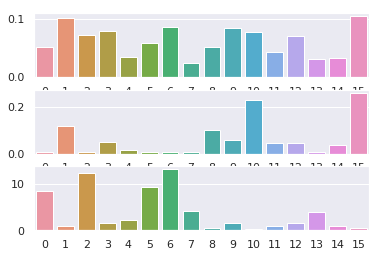

In [47]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.
compare_res = {key:np.zeros(n_clusters+1) for key in ['general','customer','ratio'] }
for i in range(n_clusters):
    compare_res['general'][i] = sum(clusters_general == i)
    compare_res['customer'][i] = sum(clusters_customer == i)
compare_res["general"][-1] = great_missing.shape[0]
compare_res['customer'][-1] = customers_great_missing.shape[0]

for key in ['general', "customer"]:
    compare_res[key] = compare_res[key] / sum(compare_res[key])

compare_res['ratio'] = compare_res['general'] / compare_res["customer"]


f, ax = plt.subplots(3,1)
a = sns.barplot(data=compare_res['general'].reshape(-1,1).tolist(), ax=ax[0])
a = sns.barplot(data=compare_res['customer'].reshape(-1,1).tolist(), ax=ax[1])
a = sns.barplot(data=compare_res['ratio'].reshape(-1,1).tolist(), ax=ax[2])
print(compare_res['general'])
print(compare_res['customer'])
print(compare_res['ratio'])

In [48]:
features_of_interests = ['PLZ8_ANTG3',
'PLZ8_ANTG4',
'CAMEO_INTL_2015_wealth',
'KBA05_ANTG1',
'PLZ8_ANTG1',
'MOBI_REGIO',
'ALTERSKATEGORIE_GROB',
'FINANZ_VORSORGER',
'SEMIO_ERL',
'FINANZ_UNAUFFAELLIGER',
'SEMIO_REL',
'FINANZ_SPARER',
'SEMIO_VERT',
'SEMIO_SOZ',
'SEMIO_FAM',
'SEMIO_DOM',
'SEMIO_KAEM',
'ANREDE_KZ']

def print_cluster(idx):

    print("PCA vector:")
    print(kms.cluster_centers_[idx])
    std_features = pca.inverse_transform(kms.cluster_centers_[idx])
    # print(std_features)
    inversed_features = []
    for idx, f_val in enumerate(std_features):
        inversed_features.append(sdscalers[df_imputed.columns[idx]].inverse_transform([f_val])[0])

    print("\nScores on Features of the First three PCA components:")
    col_val = {col:i_f for i_f, col in zip(inversed_features, df_imputed.columns)}
    for idx, col in enumerate(features_of_interests):
        if (idx + 1) % 6 == 1: print("Component {}:".format((idx + 1)//6+1))
        print(col_val[col],"\t",col)
        if (idx+1) % 3 == 0:
            print("-"*10)

In [51]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?
print_cluster(10)

PCA vector:
[-4.11421201  1.19546462  0.48211194  1.14650531  1.91474372 -0.20810247
 -1.26593926  1.17785374 -0.88273086 -2.67104139  0.27948117 -0.99318091
  0.60742329 -0.83781564 -0.26070763 -0.70401909  0.89646976  0.10190516
  0.05085564 -0.51194611 -0.00423298 -0.0058883   0.26740468 -0.15343196
 -0.05329246]

Scores on Features of the First three PCA components:
Component 1:
1.0008041792031168 	 PLZ8_ANTG3
0.31233497267097865 	 PLZ8_ANTG4
2.2312754918965063 	 CAMEO_INTL_2015_wealth
----------
2.79329294827225 	 KBA05_ANTG1
2.8370350712015235 	 PLZ8_ANTG1
4.301268690391308 	 MOBI_REGIO
----------
Component 2:
3.388417440706363 	 ALTERSKATEGORIE_GROB
4.494937611560712 	 FINANZ_VORSORGER
5.2405630610829155 	 SEMIO_ERL
----------
1.7265569566134198 	 FINANZ_UNAUFFAELLIGER
3.0163062580863294 	 SEMIO_REL
1.4703598254355754 	 FINANZ_SPARER
----------
Component 3:
4.723238178869193 	 SEMIO_VERT
3.893344957167946 	 SEMIO_SOZ
3.440351093538938 	 SEMIO_FAM
----------
4.433253823218329 	 S

In [52]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?
print_cluster(6)

PCA vector:
[ 5.45137984e+00 -1.99337742e+00 -2.70389755e-01  1.93560201e-01
 -8.19379254e-01  7.88623027e-01 -4.56290575e-01  9.28525647e-01
 -9.70071400e-01 -4.96635431e-01 -9.83704581e-02  2.85584534e-01
 -8.20675740e-02 -2.71701202e-01  9.06986082e-02 -1.56202514e-01
  2.24406699e-03 -3.20548572e-01  3.67907477e-02  2.96632875e-01
 -2.24318537e-01 -1.74525291e-01 -3.04092627e-01  8.75613557e-03
 -1.07451446e-01]

Scores on Features of the First three PCA components:
Component 1:
2.6845404907881143 	 PLZ8_ANTG3
1.5798651963977568 	 PLZ8_ANTG4
4.631666816070625 	 CAMEO_INTL_2015_wealth
----------
0.26263819030427915 	 KBA05_ANTG1
1.133705733068875 	 PLZ8_ANTG1
1.524995375223607 	 MOBI_REGIO
----------
Component 2:
1.8985257571218894 	 ALTERSKATEGORIE_GROB
2.012844464340734 	 FINANZ_VORSORGER
3.646595909483448 	 SEMIO_ERL
----------
3.659497235924676 	 FINANZ_UNAUFFAELLIGER
5.528379479047633 	 SEMIO_REL
4.339744984252338 	 FINANZ_SPARER
----------
Component 3:
3.709415847893723 	 SEMI

### Discussion 3.3: Compare Customer Data to Demographics Data

- Seen from the plots, the cluster assignment proportions are different between the general and the customer population, so the company's customer base is not universal.

- The 3rd plot shows the ratios between general population proportion and customer population proportion over the 15 clusters and the additional cluster made of the sets of instances with missing values over 20. We focus on the 8th and 4th clusters.
   - The **11th** (index 10) cluster is where customer proportion is much greater than the general proportion (22.9% vs 7.7%). People in this cluster are much more likely to be a target audience for the company. The cluster center of this group has great negative weights for the first PCA component, and positive weights for the second PCA component.
   - The **7th** (index 6) cluster is where customer proportion is much smaller than that of the general proportion (0.7% vs 8.6%), suggesting that this group of persons are outside of the target demographics. The cluster center of this group is positively associated with the 1st PCA components, and negatively associated with the 2nd PCA component, which seems to be the _opposite_ of the **11th** cluster.
   - Looking into the inversely transformed feature values, I found people in the **11th** cluster to be older, less event-oriented, slower in movement, more conservative in finantial typology, more likely to have religion beliefs and less wealthy than those in the **7th** cluster. Besides, population in the **11th** cluster are less likely to have big family houses in PLZ8 region than that in the **7th** cluster, they might be old couples/single ones live alone.
   
An relatively clear conclusion can thus be drawn: the most promising targets of this company are more likely to be those senior citizens living by themselves with a tight budget.
